# Overview of Past, Current, Future MOS Survey Projects
___
Data scrapping of sorts was performed to gather information regarding the various MOS (multi-object spectroscopic) Projects.  The associated tabular data is stored in csv files for optimal file sharing and usability.  Another notebook will employ data from dictionaries/json files.  

## Import Necessary Python Packages/Libraries and Set Options

In [664]:
import pandas as pd
import pint # pandas utility to add units
pd.set_option("display.max.columns", None)
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm
#for plotting display purposes in jupyter notebook
%matplotlib inline  

## Create Visually Appealing Table Style
Set-up a visually appealing table style/display and highlight MSE-associated values.

In [198]:
def pretty_table(styler):
    #styler.set_caption("MOS General Properties")
    #styler.background_gradient(axis=None, cmap="Purples")
    headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'}
    cell_hover = {  
    'selector': 'tr:hover',
    'props': [('background-color', '#ffffb3')]}
    # above is set for row hover; for column hover use <td> instead of <tr>
    styler.set_table_styles([headers,cell_hover])
    return styler
def highlight_MSE_row(row):
    value = row.loc['Instrument']
    if value.name == 'MSE-baseline':
        color = '#DCD3FF' # Light purple
    return ['background-color: {}'.format(color) for r in row]
#example:mos_general.style.format(precision=2).hide().pipe(pretty_table).apply(highlight_MSE_row, axis=1)

## Read in MOS Tablular Data Files
### MOS General Properties Overview:

In [199]:
mos_general = pd.read_csv('MOS_Surveys_Table_General_Properties.csv')
mos_general.style.format(precision=2).hide().pipe(pretty_table) #Remove index and appropriately format the data columns 'M1_Aperture_m' and 'FOV_deg2'
#NOTE: more rigorous setting of the format: mos_general.style.format(precision=0,formatter={'M1_Aperture_m': "{:.2f}", 'FOV_deg2': "{:.2f}"})

Instrument,Facility,Hemisphere,Status,Operations_Start,M1_Aperture_m,FOV_deg2,No_Fibers,Spectral_Coverage,IFU,Resolution_Modes
SDSS_1+2_Spectrograph,APO,N,Completed,1999,2.50,7.10,640,VIS,No,LOW
SDSS_3+4_BOSS,APO,N,Completed,2009,2.50,7.10,1000,VIS,Yes,LOW
SDSS_3+4_APOGEE,APO,N,Completed,2011,2.50,7.10,300,NIR(H),No,HIGH
SDSS_4_APOGEE,LCO,S,Completed,2017,2.50,3.10,300,NIR(H),No,HIGH
LAMOST,Guoshoujing,N,Current,2012,4.00,19.60,4000,VIS,No,LOW
HERMES,AAT,S,Current,2014,3.90,3.10,392,VIS,No,HIGH
SDSS_5_APOGEE+BOSS,APO,N,Current,2021,2.50,7.10,500,VIS;NIR(H),No,LOW;HIGH
SDSS_5_APOGEE+BOSS,LCO,S,Current,2021,2.50,3.10,500,"VIS,NIR(H)",No,LOW;HIGH
DESI,KPO,N,Current,2020,4.00,8.00,5000,VIS,No,LOW;MED
WEAVE,OOCC,N,Build,2022,4.20,3.10,1000,VIS,Yes,MED;HIGH


### MOS Specific Properties Overview:

In [191]:
mos_specific = pd.read_csv('MOS_Surveys_Table_Specific_Properties.csv') #Table Ingestion
mos_specific.style.hide().pipe(pretty_table) #Table Display

Instrument,Facility,Hemisphere,Status,Wavelength_Coverage_Regime_nm,Spectral_Resolution_Settings
SDSS_1+2_Spectrograph,APO,N,Completed,380-615; 580-920,1850-2200
SDSS_3+4_BOSS,APO,N,Completed,360-1040,1560-2270;1850-2650
SDSS_3+4_APOGEE,APO,N,Completed,1510-1700,"22,500"
SDSS_4_APOGEE,LCO,S,Completed,1510-1700,22500
LAMOST,Guoshoujing,N,Current,370-900,500;1000;1500
HERMES,AAT,S,Current,471.5-490.0;564.9-587.3;647.8-673.7;758.5-788.7,28000
SDSS_5_APOGEE+BOSS,APO,N,Current,360-1040;1510-1700,1560-2270;1850-2650;22500
SDSS_5_APOGEE+BOSS,LCO,S,Current,360-1040;1510-1700,1560-2270;1850-2650;22500
DESI,KPO,N,Current,360-555;555-656;656-980,2000-3200;3200-4100;4100-5000
WEAVE,OOCC,N,Build,366-606;579-959;404-465;473-545;595-685,5000;20000


### MOS Etendue Tablular Data:

In [192]:
etendue = pd.read_csv('MOS_Surveys_Table_Etendue.csv')
etendue.style.hide().pipe(pretty_table).format(precision=2)
#type(etendue) #verification of pandas dataframe

Instrument,Telescope,Hemisphere,Collecting_Area_m2,FOV_deg2,Etendue*
SDSS_1+2_Spectrograph,SFT,N,3.68,7.10,26.10
SDSS_3+4_BOSS,SFT,N,3.68,7.10,26.10
SDSS_3+4_APOGEE,SFT,N,3.68,7.10,26.10
SDSS_4_APOGEE,du Pont,S,nan,3.10,nan
LAMOST,Guoshoujing,N,18.86,19.60,369.70
HERMES,AAT,S,12.00,3.10,37.20
SDSS_5_APOGEE+BOSS,SFT,N,3.68,7.10,26.10
SDSS_5_APOGEE+BOSS,du Pont,S,nan,3.10,nan
DESI,Mayall,N,9.50,8.00,76.00
WEAVE,OOCC,N,13.80,3.10,42.80


### Merged-Information Table
It is easily possible for above tables to be merged in order to combine all information into a single, master table.

In [194]:
merged = mos_specific.merge(etendue,on='Instrument')
merged.style.hide().pipe(pretty_table).format(precision=2)

Instrument,Facility,Hemisphere_x,Status,Wavelength_Coverage_Regime_nm,Spectral_Resolution_Settings,Telescope,Hemisphere_y,Collecting_Area_m2,FOV_deg2,Etendue*
SDSS_1+2_Spectrograph,APO,N,Completed,380-615; 580-920,1850-2200,SFT,N,3.68,7.10,26.10
SDSS_3+4_BOSS,APO,N,Completed,360-1040,1560-2270;1850-2650,SFT,N,3.68,7.10,26.10
SDSS_3+4_APOGEE,APO,N,Completed,1510-1700,"22,500",SFT,N,3.68,7.10,26.10
SDSS_4_APOGEE,LCO,S,Completed,1510-1700,22500,du Pont,S,nan,3.10,nan
LAMOST,Guoshoujing,N,Current,370-900,500;1000;1500,Guoshoujing,N,18.86,19.60,369.70
HERMES,AAT,S,Current,471.5-490.0;564.9-587.3;647.8-673.7;758.5-788.7,28000,AAT,S,12.00,3.10,37.20
SDSS_5_APOGEE+BOSS,APO,N,Current,360-1040;1510-1700,1560-2270;1850-2650;22500,SFT,N,3.68,7.10,26.10
SDSS_5_APOGEE+BOSS,APO,N,Current,360-1040;1510-1700,1560-2270;1850-2650;22500,du Pont,S,nan,3.10,nan
SDSS_5_APOGEE+BOSS,LCO,S,Current,360-1040;1510-1700,1560-2270;1850-2650;22500,SFT,N,3.68,7.10,26.10
SDSS_5_APOGEE+BOSS,LCO,S,Current,360-1040;1510-1700,1560-2270;1850-2650;22500,du Pont,S,nan,3.10,nan


### Merged-Information Table (Distributed)
Yet, for convenience and eventual plotting purposes, a table (named 'MOS_Surveys_Combined.csv') has already been prepared and is available for distribution/download.

In [586]:
#rows_to_skip = range(1,5)
combined_table = pd.read_csv('MOS_Surveys_Table_Combined.csv',skiprows=[1,2,3,4,22])
combined_table.style.pipe(pretty_table).format(precision=2).hide()

Instrument,Instr_short,Facility,Hemisphere,Status,Operations_Start,M1_Aperture_m,FOV_deg2,Fiber_Number,Spectral Coverage,Resolution_Mode,Wavelength_Coverage_Regimes_nm,WL_MIN_nm,WL_MAX_nm,WL_Coverage_Type,Spectral Resolution Settings,R_MIN,R_MAX,Collecting_Area_m2,Etendue
LAMOST,LAMOST,Guoshoujing,N,Current,2012,4.00,19.60,4000,VIS,LOW,370-900,370.00,900.00,continuous,500;1000;1500,500.00,1500.00,18.86,369.66
HERMES,HERMES,AAT,S,Current,2014,3.90,3.10,392,VIS,HIGH,471.5-490.0;564.9-587.3;647.8-673.7;758.5-788.7,471.50,788.70,discontinuous,28000,28000.00,28000.00,12.00,37.20
SDSS_5_APOGEE+BOSS,SDSS5_APO,APO,N,Current,2021,2.50,7.10,500,VIS,LOW,360-1040,360.00,1040.00,continuous,1560-2270;1850-2650,1560.00,2650.00,3.68,26.13
SDSS_5_APOGEE+BOSS,SDSS5_APO,APO,N,Current,2021,2.50,7.10,500,NIR(H),HIGH,1510-1700,1510.00,1710.00,continuous,22500,22500.00,22500.00,3.68,26.13
SDSS_5_APOGEE+BOSS,SDSS5_LCO,LCO,S,Current,2021,2.50,3.10,500,VIS,LOW,360-1040,360.00,1040.00,continuous,1560-2270;1850-2650,1560.00,2650.00,nan,nan
SDSS_5_APOGEE+BOSS,SDSS5_LCO,LCO,S,Current,2021,2.50,3.10,500,NIR(H),HIGH,1510-1700,1510.00,1700.00,continuous,22500,22500.00,22500.00,nan,nan
DESI,DESI,KPO,N,Current,2020,4.00,8.00,5000,VIS,LOW,360-555;555-656,360.00,656.00,continuous,2000-3200;3200-4100,2000.00,4100.00,9.50,76.00
DESI,DESI,KPO,N,Current,2020,4.00,8.00,5000,VIS,MED,656-980,656.00,980.00,continuous,4100-5100,4100.00,5100.00,9.50,76.00
WEAVE,WEAVE,OOCC,N,Build,2022,4.20,3.10,1000,VIS,MED,366-606;579-959,366.00,959.00,continuous,5000,5000.00,5000.00,13.80,42.78
WEAVE,WEAVE,OOCC,N,Build,2022,4.20,3.10,1000,VIS,HIGH,404-465;473-545;595-685,404.00,685.00,discontinuous,20000,20000.00,20000.00,13.80,42.78


## MOS Survey Table Plots and Extended Visualizations

### Matplotlib Plots
Generate plot of etendue as a function of wavelength coverage for the various MOS Projects.

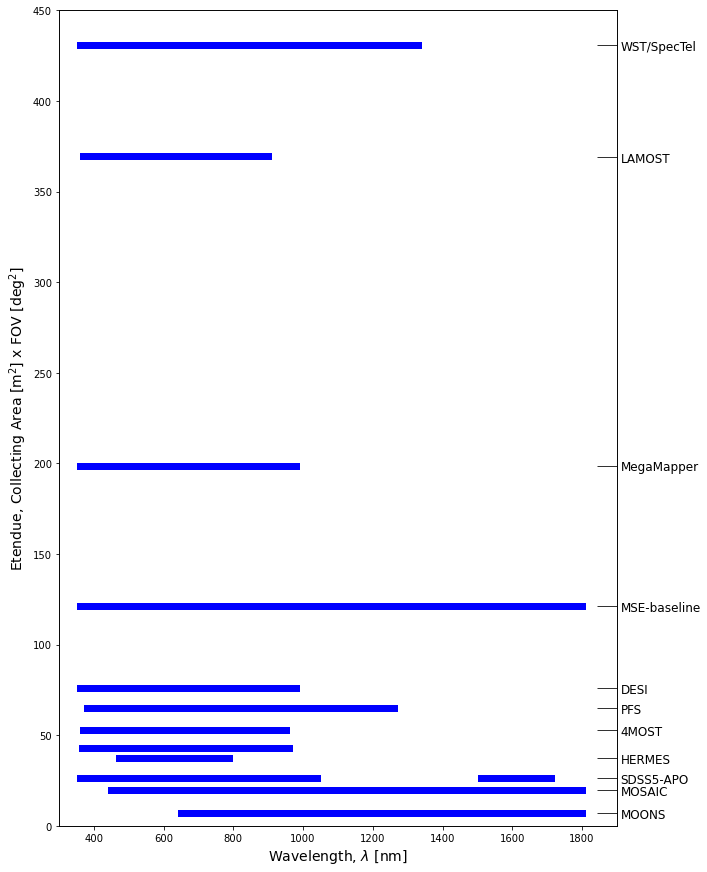

In [528]:
#Set-up and generate plot with secondary axis and artifically thick matplotlib lines
fig,ax = plt.subplots(figsize = (10, 15))
ax.set(xlim=(300, 1900), ylim=(0, 450))
ax.set_xlabel("Wavelength, $\lambda$ [nm]", size=14)
ax.set_ylabel("Etendue, Collecting Area [m$^2$] x FOV [deg$^2$]", color = 'black', size=14)
ax.plot([combined_table['WL_MIN_nm'], combined_table['WL_MAX_nm']], 
            [combined_table['Etendue'],combined_table['Etendue']], c='blue', lw=7)
ax2=ax.twinx() #alternate specification: ax2 = ax.secondary_yaxis("right")
ax2.tick_params(axis="y", direction="in", length=20)
ax2.set(xlim=(300, 1900), ylim=(0, 450))
# Set-up and apply custom tick labels
ax2.set_yticks([6.84,19.56,26.13,37.2,52.8,65.0,76.0,121.2,198.8,369,430.7])
ax2.set_yticklabels(['MOONS','MOSAIC','SDSS5-APO','HERMES','4MOST','PFS','DESI','MSE-baseline','MegaMapper',
                     'LAMOST','WST/SpecTel'],size=12);
# Argh, plot idiosyncracy: FOBOS and MOONS have almost exact same etendue values; display only MOONS now

### Pandas 

In [ ]:
#Group Dataframe
combined_table['height'] = combined_table['WL_MAX_nm'] - combined_table['WL_MIN_nm']
combined_table_grouped   = combined_table.set_index(['Instr_short'])

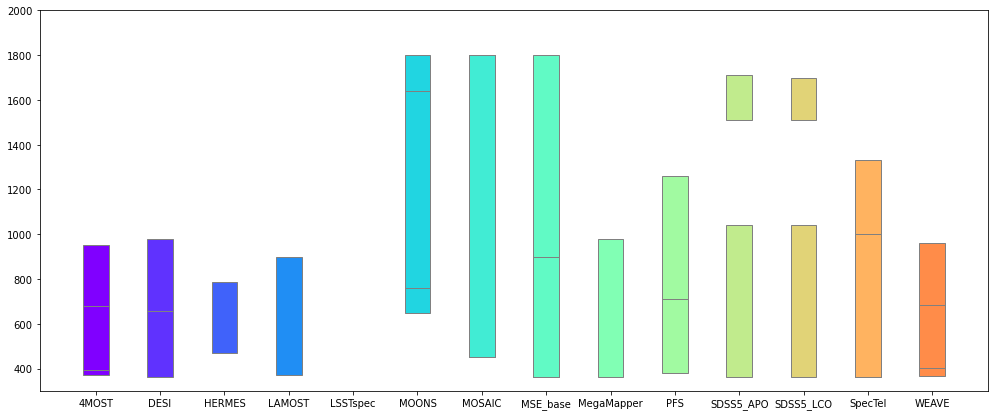

In [744]:
#fig,ax = plt.subplots
#Create color mapping
#cmap = plt.cm.get_cmap('Accent',14)
#color_idx = 0
plt.rcParams["figure.figsize"] = (17, 7)
bar_color=iter(cm.rainbow(np.linspace(0,1,17)))
#Loop through the levels of the grouped DataFrame
for each_type, df_type in combined_table_grouped.groupby(level=0):
    #print(df_type)
    plt.bar(x=[each_type]*len(df_type), height=df_type['height'], bottom=df_type['WL_MIN_nm'], width=0.4, 
            edgecolor='grey', color=next(bar_color))
    color_idx += 1
plt.ylim([300,2000])
plt.show()

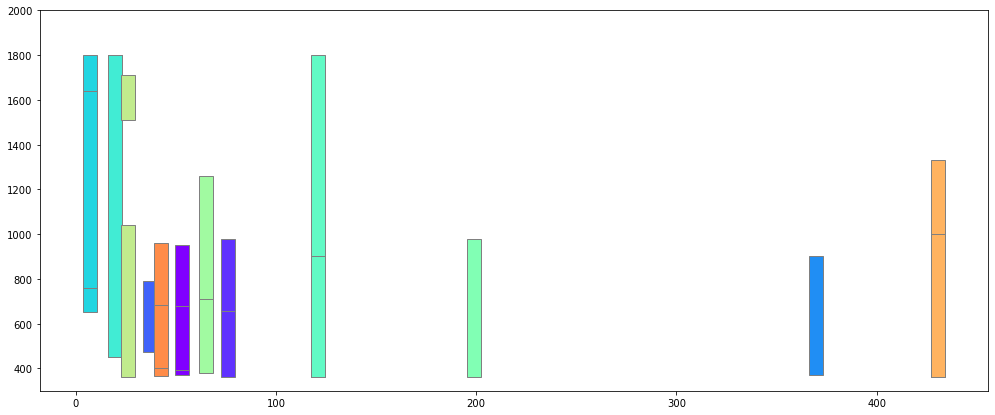

In [792]:
#Group Dataframe
combined_table['height'] = combined_table['WL_MAX_nm'] - combined_table['WL_MIN_nm']
combined_table_grouped   = combined_table.set_index(['Instr_short'])
plt.rcParams["figure.figsize"] = (17, 7)
#Create color mapping
#cmap = plt.cm.get_cmap('Accent',14)
#color_idx = 0
bar_color=iter(cm.rainbow(np.linspace(0,1,17)))
#Loop through the levels of the grouped DataFrame
for each_type, df_type in combined_table_grouped.groupby(level=0):
    #print(df_type['Instrument'])
    barplot=plt.bar(x=df_type['Etendue'], height=df_type['height'], bottom=df_type['WL_MIN_nm'], width=7,
               edgecolor='grey', color=next(bar_color))
    color_idx += 1     
plt.ylim([300,2000])

plt.show()

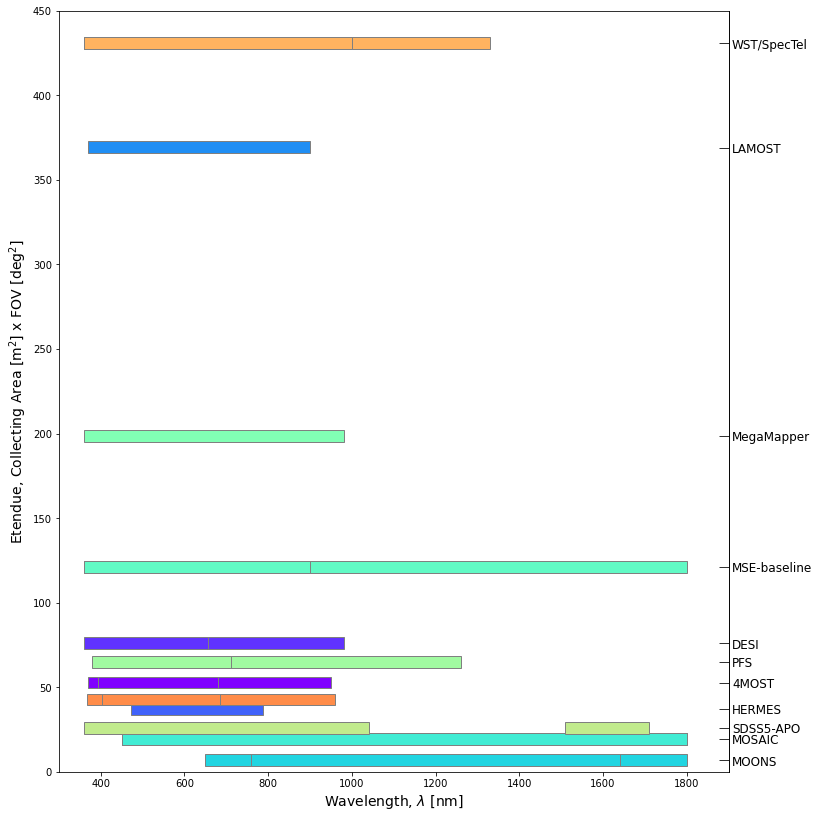

In [795]:
#Group dataframe
combined_table['height'] = combined_table['WL_MAX_nm'] - combined_table['WL_MIN_nm']
combined_table_grouped   = combined_table.set_index(['Instr_short'])

#Set-up Plot 
plt.rcParams["figure.figsize"] = (12, 14)
bar_color=iter(cm.rainbow(np.linspace(0,1,17)))
fig, ax = plt.subplots()

#Loop through the grouped dataframe and generate horizontal bar plot
for each_type, df_type in combined_table_grouped.groupby(level=0):
    #print(df_type['Instrument'])
    barplot=ax.barh(y=df_type['Etendue'], width=df_type['height'], height = 7, left=df_type['WL_MIN_nm'],
               edgecolor='grey', color=next(bar_color))
    #ax.bar_label(barplot)
    color_idx += 1    
ax.set_ylabel("Etendue, Collecting Area [m$^2$] x FOV [deg$^2$]", color = 'black', size=14)
ax.set_xlabel("Wavelength, $\lambda$ [nm]", size=14)
ax.set(xlim=(300, 1900), ylim=(0, 450))

ax2= ax.secondary_yaxis("right")
ax2.tick_params(axis="y", direction="in", length=10)
ax2.set(ylim=[300,1900])
# Set-up and apply custom tick labels
ax2.set_yticks([6.84,19.56,26.13,37.2,52.8,65.0,76.0,121.2,198.8,369,430.7])
ax2.set_yticklabels(['MOONS','MOSAIC','SDSS5-APO','HERMES','4MOST','PFS','DESI','MSE-baseline','MegaMapper',
                     'LAMOST','WST/SpecTel'],size=12)
plt.show()

### Seaborn

In [551]:
import seaborn as sns
wl_min_values

array([ 370. ,  471.5,  360. , 1510. ,  360. , 1510. ,  360. ,  656. ,
        366. ,  404. ,  650. ,  760. ,  380. ,  710. ,  370. ,  392.6,
        360. ,  360. ,  360. ,  360. ,  360. ,    nan,  450. ,  450. ])